# Street Light Fault Prediction

In [4]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/street-light-fault-prediction-dataset/street_light_fault_prediction_dataset.csv


In [8]:
import os

# Construct the file path using the downloaded dataset path
file_path = os.path.join(vizeno_street_light_fault_prediction_dataset_path, 'street_light_fault_prediction_dataset.csv')
df = pd.read_csv(file_path)

df['timestamp'] = pd.to_datetime(df['timestamp'])
display(df.head())

,bulb_number,timestamp,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),environmental_conditions,current_fluctuations_env (Amperes),fault_type
0,1,2023-09-06 07:53:23,106.18,238.52,6.127984,21.97,Rainy,0.780000,1
1,1,2023-03-28 16:28:29,58.71,235.99,3.010000,24.16,Clear,0.100000,0
2,1,2023-09-20 19:17:46,195.49,234.97,1.060000,13.64,Rainy,0.920000,0
3,1,2023-02-03 18:19:43,95.64,225.74,2.160000,15.82,Rainy,3.060000,0
4,1,2023-01-12 13:43:48,70.92,218.76,1.830000,19.12,Rainy,6.529021,4


In [9]:
df.describe()

,bulb_number,timestamp,power_consumption (Watts),voltage_levels (Volts),current_fluctuations (Amperes),temperature (Celsius),current_fluctuations_env (Amperes),fault_type
count,34310.000000,34310,34310.000000,34310.000000,34310.000000,34310.000000,34310.000000,34310.000000
mean,47.500000,2023-07-02 22:07:46.138210560,123.089437,225.694952,2.665172,20.026780,2.865040,0.841708
min,1.000000,2023-01-01 00:33:30,21.518042,210.000000,0.000000,10.000000,0.000000,0.000000
25%,24.000000,2023-04-03 13:44:37.750000128,85.929269,217.740000,1.310000,15.020000,1.400000,0.000000
50%,47.500000,2023-07-02 15:20:40,123.241718,225.660000,2.600000,20.040000,2.800000,0.000000
75%,71.000000,2023-10-01 08:58:27,160.149951,233.250000,3.900000,25.030000,4.110000,1.000000
max,94.000000,2023-12-31 23:46:21,200.000000,259.305759,9.960166,30.000000,9.882978,4.000000
std,27.134323,NaN,43.484856,9.324979,1.648494,5.772737,1.804107,1.419514


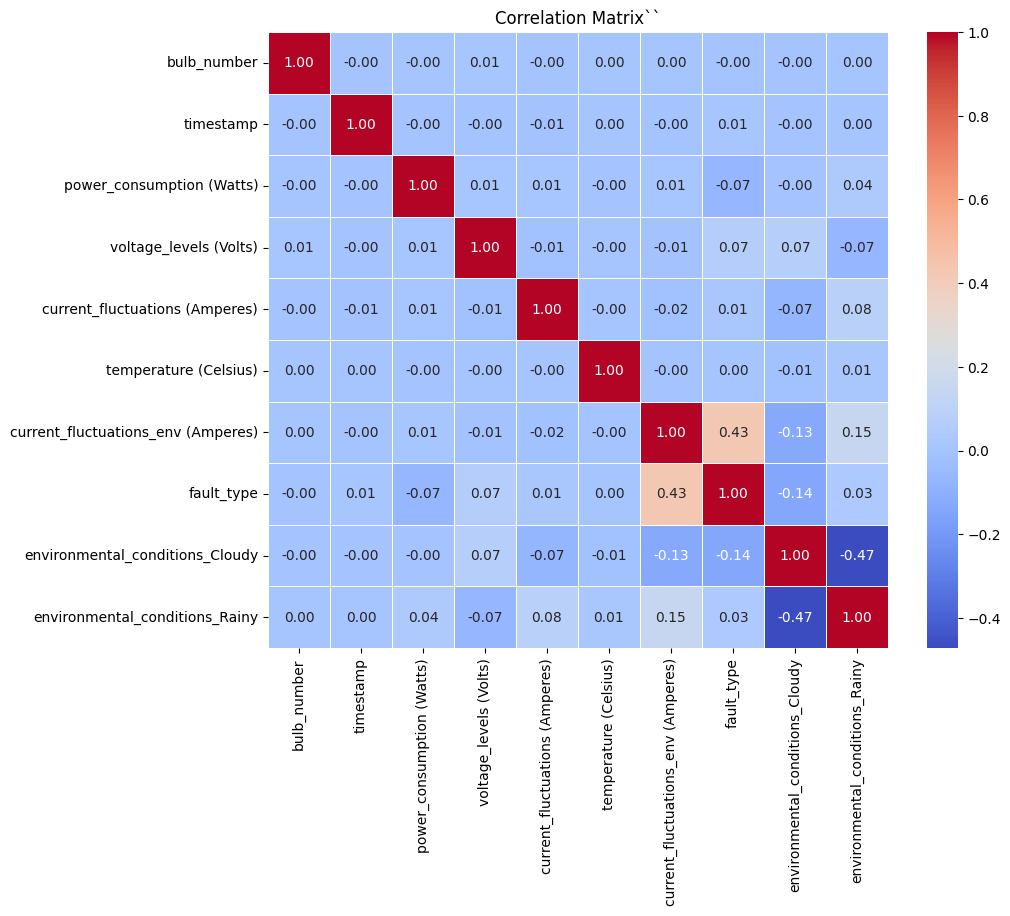

In [10]:
df1 = pd.get_dummies(df, columns=['environmental_conditions'], drop_first=True)
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix``")
plt.show()

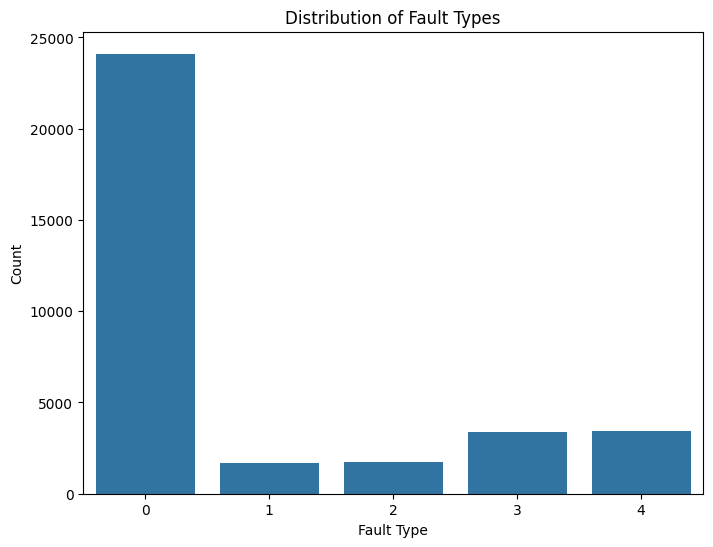

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fault_type', data=df)
plt.title("Distribution of Fault Types")
plt.xlabel("Fault Type")
plt.ylabel("Count")
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
features = ['power_consumption (Watts)', 'voltage_levels (Volts)', 'current_fluctuations (Amperes)', 'temperature (Celsius)', 'current_fluctuations_env (Amperes)']
target = 'fault_type'

for feature in features:
    df[feature] = pd.to_numeric(df[feature].astype(str).replace('[^0-9.]', '', regex=True), errors='coerce')

df = pd.get_dummies(df, columns=['environmental_conditions'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(df[features + list(df.columns[df.columns.str.startswith('environmental_conditions')])], df[target], test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Accuracy: 0.85

Confusion Matrix:
[[4844    0    0   17    2]
 [  78  235    0    0    0]
 [ 160    0  154    1    0]
 [ 571    0    0   92    0]
 [ 220    0    0    0  488]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4863
           1       1.00      0.75      0.86       313
           2       1.00      0.49      0.66       315
           3       0.84      0.14      0.24       663
           4       1.00      0.69      0.81       708

    accuracy                           0.85      6862
   macro avg       0.93      0.61      0.69      6862
weighted avg       0.86      0.85      0.82      6862



In [13]:

print("Feature names during model training:")
print(rf_model.feature_names_in_)


Feature names during model training:
['power_consumption (Watts)' 'voltage_levels (Volts)'
 'current_fluctuations (Amperes)' 'temperature (Celsius)'
 'current_fluctuations_env (Amperes)' 'environmental_conditions_Cloudy'
 'environmental_conditions_Rainy']


In [14]:

manual_values = {
    'power_consumption (Watts)': 48.423,
    'voltage_levels (Volts)': 218.93,
    'current_fluctuations (Amperes)': 3.01,
    'temperature (Celsius)': 28.34,
    'current_fluctuations_env (Amperes)': 1.95,
    'environmental_conditions_Cloudy': False,
    'environmental_conditions_Rainy': False
}

manual_df = pd.DataFrame([manual_values])

for feature in features:
    manual_df[feature] = pd.to_numeric(manual_df[feature], errors='coerce')

manual_pred = rf_model.predict(manual_df)

print("Manual Prediction:")
print("Predicted Fault Type:", manual_pred[0])


Manual Prediction:
Predicted Fault Type: 3


In [15]:

manual_values_2 = {
    'power_consumption (Watts)': 176.39,
    'voltage_levels (Volts)': 213.09,
    'current_fluctuations (Amperes)': 3.64,
    'temperature (Celsius)': 23.2,
    'current_fluctuations_env (Amperes)': 7.106,
    'environmental_conditions_Cloudy': False,
    'environmental_conditions_Rainy': False
}

manual_df_2 = pd.DataFrame([manual_values_2])

for feature in features:
    manual_df_2[feature] = pd.to_numeric(manual_df_2[feature], errors='coerce')

manual_pred_2 = rf_model.predict(manual_df_2)

print("Manual Prediction:")
print("Predicted Fault Type:", manual_pred_2[0])


Manual Prediction:
Predicted Fault Type: 4


In [16]:

manual_values_3 = {
    'power_consumption (Watts)': 157.14,
    'voltage_levels (Volts)': 228.39,
    'current_fluctuations (Amperes)': 6.849,
    'temperature (Celsius)': 24.38,
    'current_fluctuations_env (Amperes)': 1.06,
    'environmental_conditions_Cloudy': False,
    'environmental_conditions_Rainy': False
}

manual_df_3 = pd.DataFrame([manual_values_3])


for feature in features:
    manual_df_3[feature] = pd.to_numeric(manual_df_3[feature], errors='coerce')

manual_pred_3 = rf_model.predict(manual_df_3)

print("Manual Prediction:")
print("Predicted Fault Type:", manual_pred_3[0])


Manual Prediction:
Predicted Fault Type: 1


In [17]:

manual_values_4 = {
    'power_consumption (Watts)': 107.45,
    'voltage_levels (Volts)': 248.126,
    'current_fluctuations (Amperes)': 0.7,
    'temperature (Celsius)': 23.36,
    'current_fluctuations_env (Amperes)': 4.77,
    'environmental_conditions_Cloudy': True,
    'environmental_conditions_Rainy': False
}

manual_df_4 = pd.DataFrame([manual_values_4])

for feature in features:
    manual_df_4[feature] = pd.to_numeric(manual_df_4[feature], errors='coerce')


manual_pred_4 = rf_model.predict(manual_df_4)

print("Manual Prediction:")
print("Predicted Fault Type:", manual_pred_4[0])


Manual Prediction:
Predicted Fault Type: 2


In [18]:

manual_values_5 = {
    'power_consumption (Watts)': 187.86,
    'voltage_levels (Volts)': 212.43,
    'current_fluctuations (Amperes)': 4.28,
    'temperature (Celsius)': 21.59,
    'current_fluctuations_env (Amperes)': 2.04,
    'environmental_conditions_Cloudy': False,
    'environmental_conditions_Rainy': True
}

manual_df_5 = pd.DataFrame([manual_values_5])

for feature in features:
    manual_df_5[feature] = pd.to_numeric(manual_df_5[feature], errors='coerce')

manual_pred_5 = rf_model.predict(manual_df_5)

print("Manual Prediction:")
print("Predicted Fault Type:", manual_pred_5[0])


Manual Prediction:
Predicted Fault Type: 0


In [19]:
# Define the features used in the model
features = ['power_consumption (Watts)', 'voltage_levels (Volts)', 'current_fluctuations (Amperes)', 'temperature (Celsius)', 'current_fluctuations_env (Amperes)']
environmental_features = ['environmental_conditions_Cloudy', 'environmental_conditions_Rainy']

# Create a dictionary to store user input
user_input = {}

# Get user input for each numerical feature
for feature in features:
    while True:
        try:
            value = float(input(f"Enter value for {feature}: "))
            user_input[feature] = value
            break
        except ValueError:
            print("Invalid input. Please enter a number.")

# Get user input for environmental conditions
print("Enter environmental conditions:")
print("1: Clear")
print("2: Cloudy")
print("3: Rainy")

while True:
    env_choice = input("Enter your choice (1, 2, or 3): ")
    if env_choice == '1':
        user_input['environmental_conditions_Cloudy'] = False
        user_input['environmental_conditions_Rainy'] = False
        break
    elif env_choice == '2':
        user_input['environmental_conditions_Cloudy'] = True
        user_input['environmental_conditions_Rainy'] = False
        break
    elif env_choice == '3':
        user_input['environmental_conditions_Cloudy'] = False
        user_input['environmental_conditions_Rainy'] = True
        break
    else:
        print("Invalid choice. Please enter 1, 2, or 3.")


# Create a DataFrame from user input
user_df = pd.DataFrame([user_input])

# Ensure the order of columns in user_df matches the order of features used during training
# This is important for correct prediction
user_df = user_df[features + environmental_features]


# Make a prediction using the trained model
predicted_fault_type = rf_model.predict(user_df)

print("\nPrediction:")
print("Predicted Fault Type:", predicted_fault_type[0])

Enter value for power_consumption (Watts): 40
Enter value for voltage_levels (Volts): 220
Enter value for current_fluctuations (Amperes): 2.5
Enter value for temperature (Celsius): 23
Enter value for current_fluctuations_env (Amperes): 5
Enter environmental conditions:
1: Clear
2: Cloudy
3: Rainy
Enter your choice (1, 2, or 3): 3

Prediction:
Predicted Fault Type: 3


In [6]:
import os

# The path where kagglehub downloads datasets is typically in the working directory
# Let's list the files in the downloaded directory to find the correct path
download_path = vizeno_street_light_fault_prediction_dataset_path # This variable was set in the first cell
for dirname, _, filenames in os.walk(download_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/street-light-fault-prediction-dataset/street_light_fault_prediction_dataset.csv


In [21]:
import joblib

# Agar scikit-learn, XGBoost, RandomForest etc. ka model hai:
joblib.dump(rf_model, 'model.pkl')

# Agar TensorFlow/Keras model hai:
# model.save('model.h5') # This line is commented out as it's not a TensorFlow/Keras model

['model.pkl']